In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
data = pd.read_csv('IBM_HR-Employee-Attrition.csv') #Attrition is my target column
pd.set_option('display.max_columns', None)

In [128]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [130]:
pd.isnull(data).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [131]:
data.shape

(1470, 35)

In [132]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [133]:
numerical_cols = data.select_dtypes(include=[np.number])

In [134]:
numerical_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [135]:
categorical_cols = data.select_dtypes(include=['category', object])

In [136]:
categorical_cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [181]:
categorical_cols.shape

(1470, 9)

In [137]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [138]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [139]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [140]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [141]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [142]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [143]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [144]:
data.Over18.unique()

array(['Y'], dtype=object)

In [145]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [146]:
sns.countplot(x="Attrition",data=data)

<Axes: xlabel='Attrition', ylabel='count'>

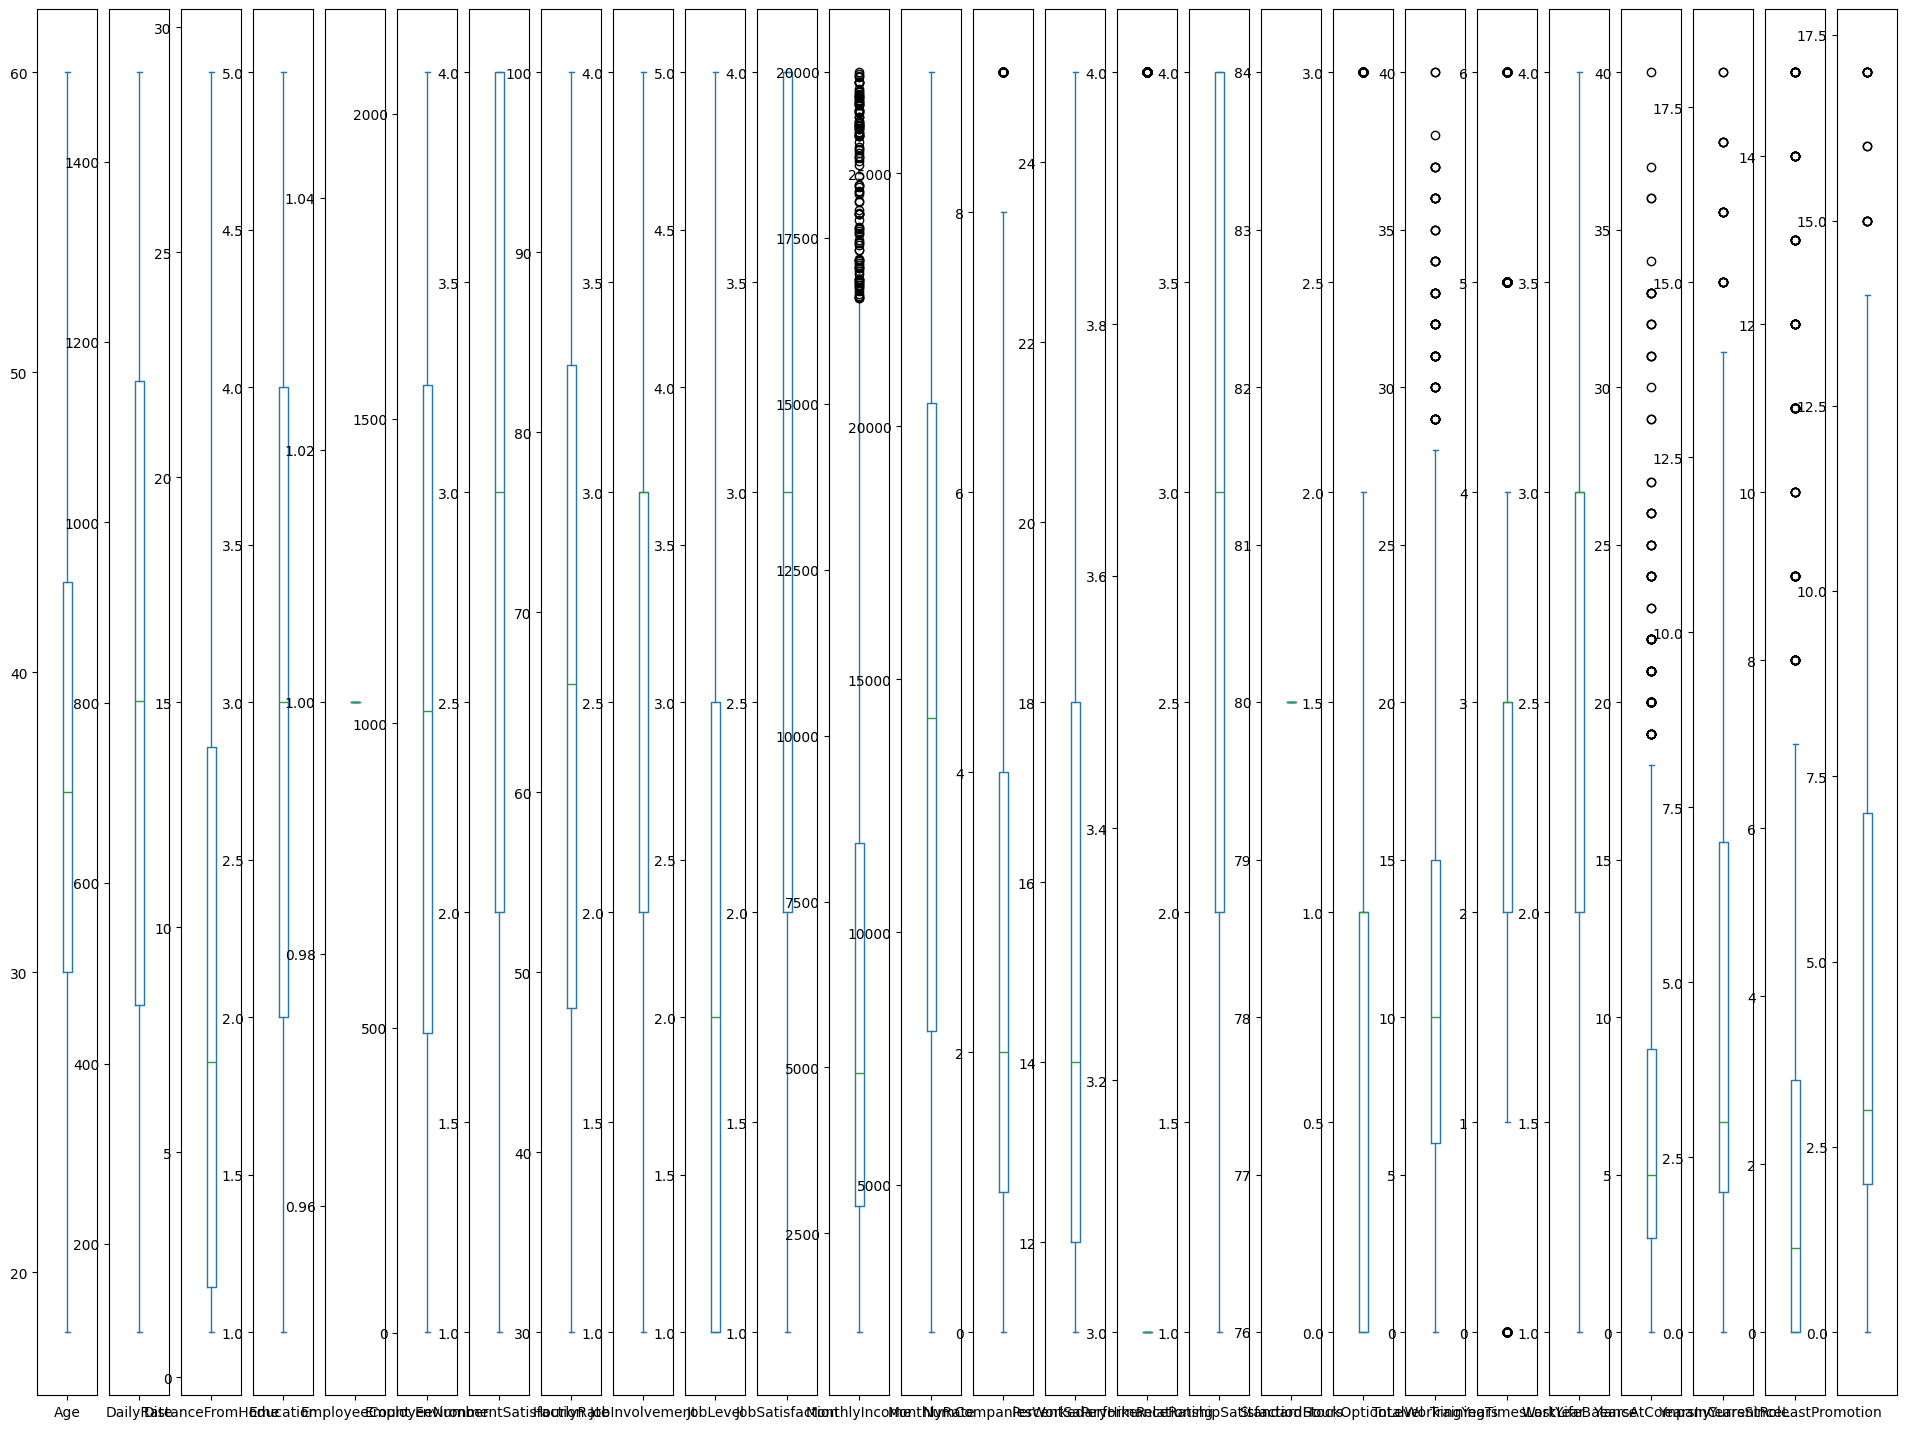

In [147]:
data.plot(kind="box", subplots=True, figsize=(24,18))
plt.xticks([])
plt.show()

<Axes: xlabel='BusinessTravel', ylabel='count'>

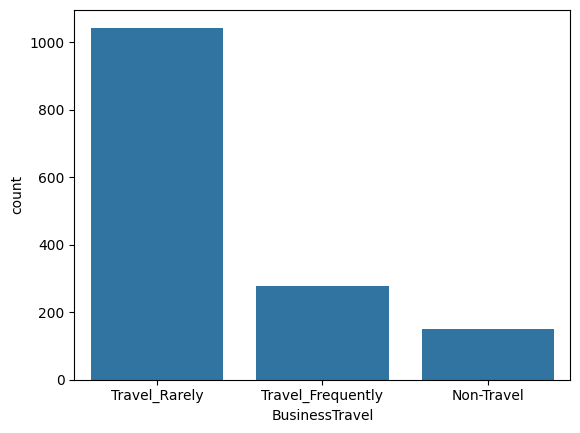

In [148]:
sns.countplot(x="BusinessTravel",data=data)

<Axes: xlabel='Department', ylabel='count'>

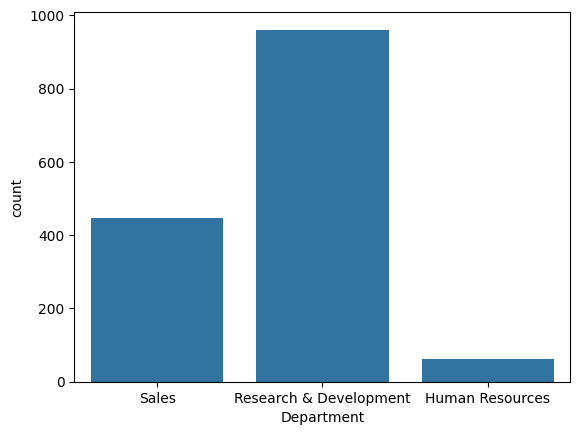

In [149]:
sns.countplot(x="Department",data=data)

<Axes: xlabel='EducationField', ylabel='count'>

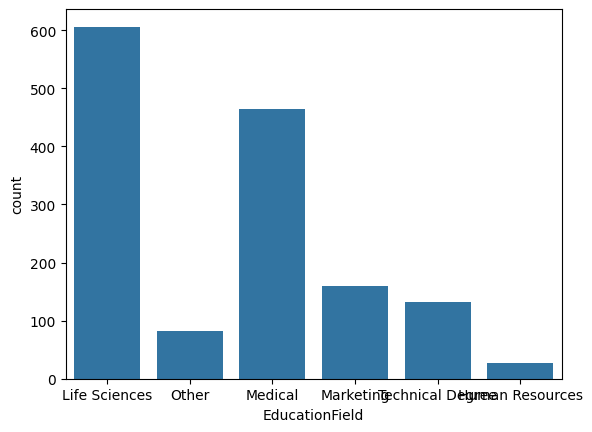

In [150]:
sns.countplot(x="EducationField",data=data)

<Axes: xlabel='Gender', ylabel='count'>

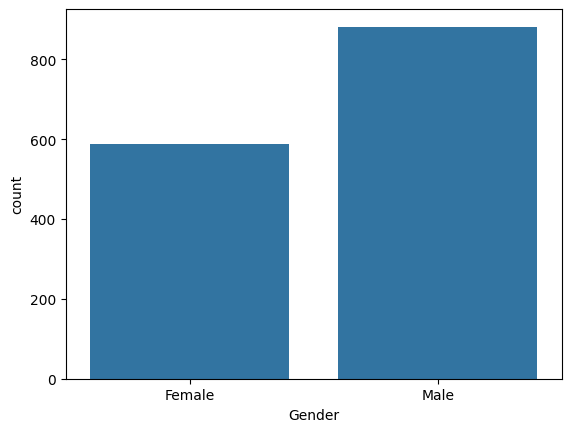

In [151]:
sns.countplot(x="Gender",data=data)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

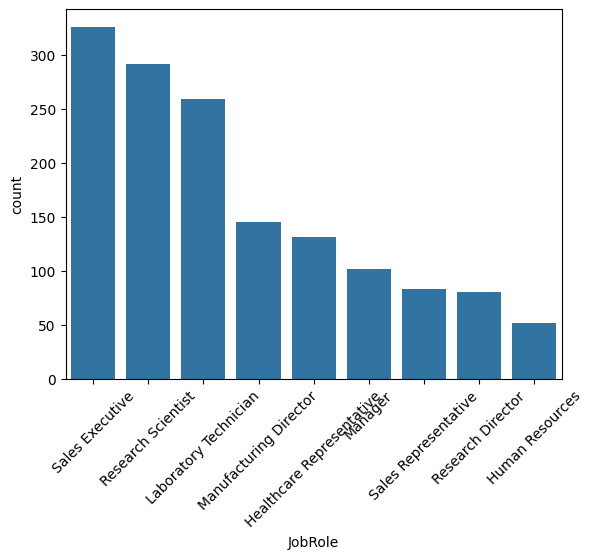

In [152]:
sns.countplot(x="JobRole",data=data)
plt.xticks(rotation=45)

<Axes: xlabel='MaritalStatus', ylabel='count'>

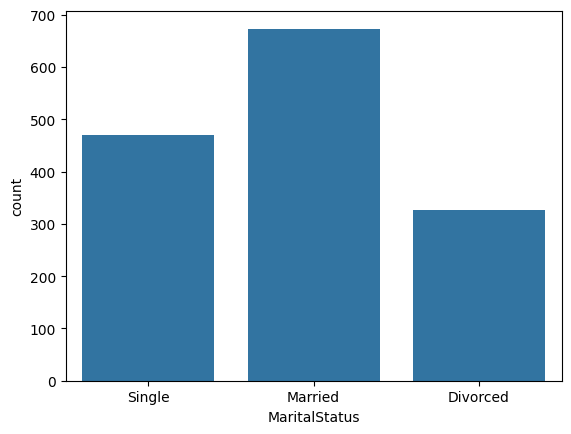

In [153]:
sns.countplot(x="MaritalStatus",data=data)

<Axes: xlabel='OverTime', ylabel='count'>

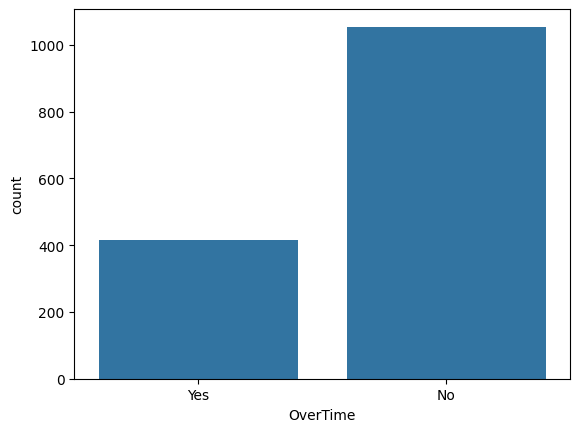

In [154]:
sns.countplot(x="OverTime",data=data)

In [155]:
#import libraries
from catboost import CatBoostClassifier,Pool #pip install catboost #pip install Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [156]:
#We need to decide best columns for consideration
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

In [157]:
cat_features = X.select_dtypes(include=["object", "category"]).columns
cat_features_idx = [X.columns.get_loc(col) for col in cat_features]

print("Categorical Features:", cat_features.tolist())

Categorical Features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [159]:
#Pool Object
train_pool = Pool(
    X_train,
    y_train,
    cat_features=cat_features_idx
)

test_pool = Pool(
    X_test,
    y_test,
    cat_features=cat_features_idx
)

In [160]:
#Train CatBoost Model 
#these are the default parameter which are stringly considered as hyperparameter
#hence it does not need hyparameter tuning at all
catboost=CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

In [161]:
catboost.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)

0:	test: 0.6640107	best: 0.6640107 (0)	total: 110ms	remaining: 55s
100:	test: 0.8030838	best: 0.8104919 (57)	total: 6.54s	remaining: 25.9s
200:	test: 0.7917133	best: 0.8104919 (57)	total: 13s	remaining: 19.3s
300:	test: 0.7861142	best: 0.8104919 (57)	total: 20.3s	remaining: 13.4s
400:	test: 0.7866311	best: 0.8104919 (57)	total: 28.6s	remaining: 7.06s
499:	test: 0.7864588	best: 0.8104919 (57)	total: 35.7s	remaining: 0us

bestTest = 0.8104918598
bestIteration = 57

Shrink model to first 58 iterations.


In [162]:
# Predictions
y_pred = catboost.predict(X_test)
y_pred_proba = catboost.predict_proba(X_test)

In [163]:
X_test.head(1)

Age BusinessTravel  DailyRate Department  DistanceFromHome  Education  \
1061   24     Non-Travel        830      Sales                13          2   

     EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
1061  Life Sciences              1            1495                        4   

      Gender  HourlyRate  JobInvolvement  JobLevel               JobRole  \
1061  Female          78               3         1  Sales Representative   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1061                2       Married           2033         7103   

      NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
1061                   1      Y       No                 13   

      PerformanceRating  RelationshipSatisfaction  StandardHours  \
1061                  3                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1061                 1                  1                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1061                3               1                   0   

      YearsSinceLastPromotion  YearsWithCurrManager  
1061                        0                     0

In [182]:
X_test.shape

(294, 34)

In [164]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8469387755102041

Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.99      0.92       247
         Yes       0.67      0.09      0.15        47

    accuracy                           0.85       294
   macro avg       0.76      0.54      0.53       294
weighted avg       0.82      0.85      0.79       294


Confusion Matrix:
 [[245   2]
 [ 43   4]]


In [165]:
#Feature Importance
feature_importance = catboost.get_feature_importance()
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(10))

                    Feature  Importance
21                 OverTime   11.952239
14                  JobRole    8.069640
0                       Age    5.169436
9   EnvironmentSatisfaction    5.027500
26         StockOptionLevel    4.992744
13                 JobLevel    4.306196
1            BusinessTravel    4.300236
4          DistanceFromHome    4.188391
19       NumCompaniesWorked    4.051533
16            MaritalStatus    3.953189


In [166]:
# Save model
catboost.save_model("catboost_model.cbm")

# Load model
loaded_model = CatBoostClassifier()
loaded_model.load_model("catboost_model.cbm")

In [167]:
unseen_data = pd.read_csv("HR-Employee-Attrition_New Data.csv")

In [168]:
unseen_data = unseen_data[loaded_model.feature_names_]

In [169]:
unseen_data.head()

Age     BusinessTravel  DailyRate              Department  \
0   55      Travel_Rarely       1200  Research & Development   
1   49  Travel_Frequently        350  Research & Development   
2   37      Travel_Rarely        340  Research & Development   
3   33  Travel_Frequently        900  Research & Development   
4   27      Travel_Rarely        750  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          20               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [170]:
# Class prediction
final_predictions = loaded_model.predict(unseen_data)

# Probability prediction
final_probabilities = loaded_model.predict_proba(unseen_data)[:, 1] #optional

In [171]:
output = unseen_data.copy()
output["Predicted_Class"] = final_predictions
output["Response_Probability"] = final_probabilities #optional

output.head(5)
#output.to_csv("final_predictions.csv")

Age     BusinessTravel  DailyRate              Department  \
0   55      Travel_Rarely       1200  Research & Development   
1   49  Travel_Frequently        350  Research & Development   
2   37      Travel_Rarely        340  Research & Development   
3   33  Travel_Frequently        900  Research & Development   
4   27      Travel_Rarely        750  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          20               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager Predicted_Class  \
0                        0                     5              No   
1                        1                     7              No   
2                        0                     0              No   
3                        3                     0              No   
4                        2                     2              No   

   Response_Probability  
0              0.242201  
1              0.066297  
2              0.489466  
3              0.267413  
4              0.183646

In [172]:
#SHAP concepts
import shap #pip install shap

In [173]:
explainer = shap.TreeExplainer(catboost) #This reads:Tree splits, Leaf values, Base value (expected value)

In [174]:
# Get SHAP values for all test samples
shap_values = explainer.shap_values(X_test)

# Pick the first employee
employee_index = 0
employee_shap = shap_values[employee_index]
employee_features = X_test.iloc[employee_index]

In [175]:
# Combine feature names, feature values, and SHAP values
shap_data = pd.DataFrame({
    "Feature": X_test.columns,
    "Value": employee_features.values,
    "SHAP_contribution": employee_shap
})

# Sort by absolute contribution
shap_data["abs_SHAP"] = shap_data["SHAP_contribution"].abs()
shap_data = shap_data.sort_values(by="abs_SHAP", ascending=False).drop("abs_SHAP", axis=1)

shap_data

Feature                 Value  SHAP_contribution
27         TotalWorkingYears                     1           0.452317
33      YearsWithCurrManager                     0           0.296283
14                   JobRole  Sales Representative           0.294400
21                  OverTime                    No          -0.257007
0                        Age                    24           0.213838
30            YearsAtCompany                     1           0.209491
17             MonthlyIncome                  2033           0.206880
4           DistanceFromHome                    13           0.153076
26          StockOptionLevel                     1          -0.147050
3                 Department                 Sales           0.130332
16             MaritalStatus               Married          -0.112351
9    EnvironmentSatisfaction                     4          -0.107940
31        YearsInCurrentRole                     0           0.103418
13                  JobLevel                     1           0.087838
1             BusinessTravel            Non-Travel          -0.073358
15           JobSatisfaction                     2           0.066427
29           WorkLifeBalance                     3          -0.060395
24  RelationshipSatisfaction                     3          -0.037415
12            JobInvolvement                     3          -0.030768
19        NumCompaniesWorked                     1          -0.023394
10                    Gender                Female          -0.019640
22         PercentSalaryHike                    13           0.017376
8             EmployeeNumber                  1495           0.016036
2                  DailyRate                   830          -0.015337
28     TrainingTimesLastYear                     2           0.013535
6             EducationField         Life Sciences          -0.009204
32   YearsSinceLastPromotion                     0          -0.006262
5                  Education                     2           0.004897
11                HourlyRate                    78          -0.003133
18               MonthlyRate                  7103           0.003046
23         PerformanceRating                     3           0.001424
7              EmployeeCount                     1           0.000000
25             StandardHours                    80           0.000000
20                    Over18                     Y           0.000000

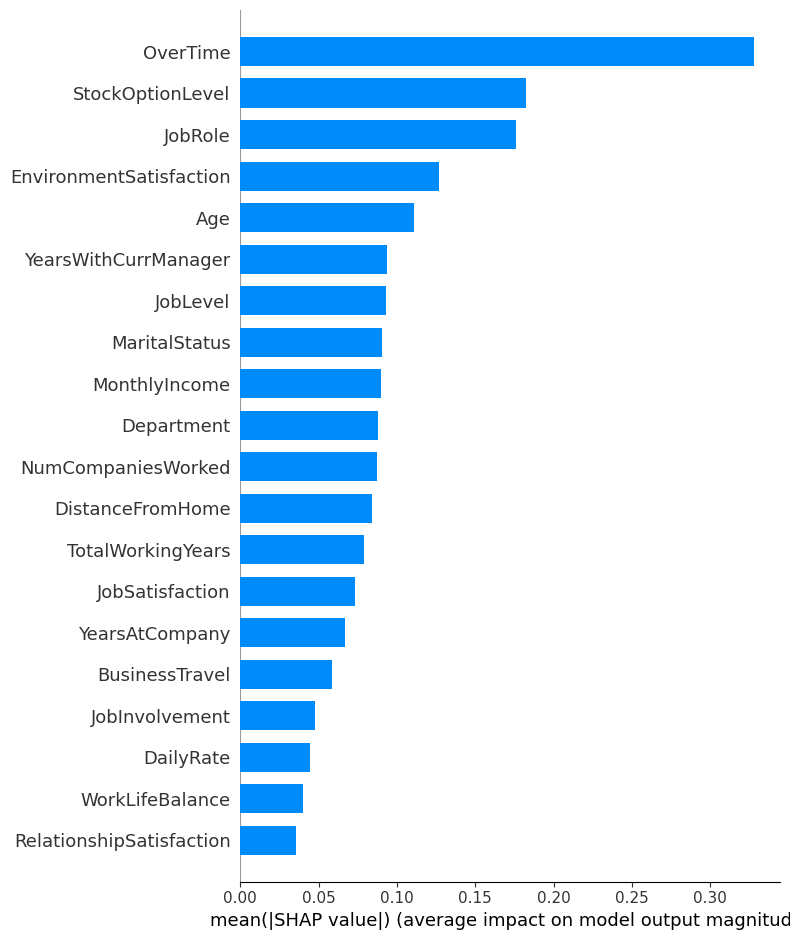

In [176]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [177]:
# Initialize JS visualization
shap.initjs()

# Force plot for the first employee
shap.force_plot(
    explainer.expected_value,  # base value (average prediction in log-odds)
    shap_values[0],            # SHAP values for this employee
    X_test.iloc[0]             # feature values (labels)
)

### From the above Force plot we are observing that the red side says that attrition of Employee 
### will be "Yes" means "they will leave", the blue side is saying that "No" means "They will not leave"
### As this is binary classification , we are observing that it uses log odds or sigmoid function to calculate attrition probability


### Using logit space makes the math additive and interpretable:
### Positive SHAP → pushes logit higher → probability increases
### Negative SHAP → pushes logit lower → probability decreases

In [178]:
# Base value (average log-odds)
base_value = explainer.expected_value
print(f"Base Value: {base_value:.2f}")

# Compute logit
logit = base_value + employee_shap.sum()
print(f"final prediction Value: {logit:.2f}")

# Convert to probability
prob_leave = 1 / (1 + np.exp(-logit))
prob_stay = 1 - prob_leave

print(f"Probability of leaving (Yes): {prob_leave:.2f}")
print(f"Probability of staying (No): {prob_stay:.2f}")

Base Value: -1.92
final prediction Value: -0.55
Probability of leaving (Yes): 0.37
Probability of staying (No): 0.63


In [179]:
final_predictions = loaded_model.predict(X_test[:1]) #from unseen data

In [180]:
print(final_predictions)

['No']
